**Run the following two cells before you begin.**

In [1]:
%autosave 10

Autosaving every 10 seconds


In [2]:
import pandas as pd
import numpy as np

______________________________________________________________________
**First, import your data set and define the sigmoid function.**
<details>
    <summary>Hint:</summary>
    The definition of the sigmoid is $f(x) = \frac{1}{1 + e^{-X}}$.
</details>

In [3]:
# Import the data set
df = pd.read_csv(r"F:\Python\technocolabs\Task 2\cleaned_data.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [4]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_CAT', 'graduate school',
       'high school', 'others', 'university'],
      dtype='object')

In [5]:
features_response = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month']
corr = df[features_response].corr()
corr.iloc[0:5,0:5]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE
LIMIT_BAL,1.000000,0.027046,-0.232688,-0.111873,0.149157
SEX,0.027046,1.000000,0.014336,-0.031307,-0.088421
EDUCATION,-0.232688,0.014336,1.000000,-0.137097,0.179035
MARRIAGE,-0.111873,-0.031307,-0.137097,1.000000,-0.412828
AGE,0.149157,-0.088421,0.179035,-0.412828,1.000000


<AxesSubplot:>

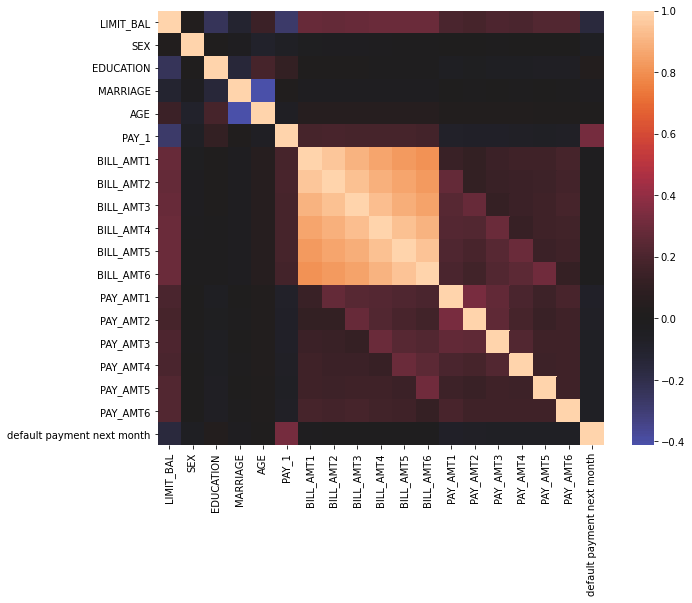

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,8))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            center=0)

In [8]:
# Define the sigmoid function
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

X=np.linspace(-10,10,100)
Z= sigmoid(X)
print(X,Z)

[-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919
  -8.98989899  -8.78787879  -8.58585859  -8.38383838  -8.18181818
  -7.97979798  -7.77777778  -7.57575758  -7.37373737  -7.17171717
  -6.96969697  -6.76767677  -6.56565657  -6.36363636  -6.16161616
  -5.95959596  -5.75757576  -5.55555556  -5.35353535  -5.15151515
  -4.94949495  -4.74747475  -4.54545455  -4.34343434  -4.14141414
  -3.93939394  -3.73737374  -3.53535354  -3.33333333  -3.13131313
  -2.92929293  -2.72727273  -2.52525253  -2.32323232  -2.12121212
  -1.91919192  -1.71717172  -1.51515152  -1.31313131  -1.11111111
  -0.90909091  -0.70707071  -0.50505051  -0.3030303   -0.1010101
   0.1010101    0.3030303    0.50505051   0.70707071   0.90909091
   1.11111111   1.31313131   1.51515152   1.71717172   1.91919192
   2.12121212   2.32323232   2.52525253   2.72727273   2.92929293
   3.13131313   3.33333333   3.53535354   3.73737374   3.93939394
   4.14141414   4.34343434   4.54545455   4.74747475   4.94949495
   5.151515

Text(0.5, 1.0, 'Sigmoid Function')

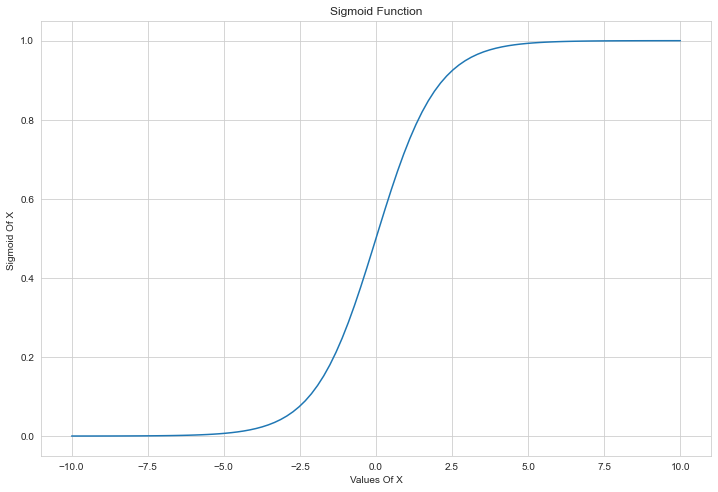

In [10]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
plt.plot(X,sigmoid(X))
plt.xlabel('Values Of X')
plt.ylabel('Sigmoid Of X ')
plt.title('Sigmoid Function')

**Now, create a train/test split (80/20) with `PAY_1` and `LIMIT_BAL` as features and `default payment next month` as values. Use a random state of 24.**

In [11]:
features = ["PAY_1","LIMIT_BAL"]
X = df[features].values
y = df["default payment next month"].values
# Create a train/test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2 ,random_state = 2)

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21331, 2)
(5333, 2)
(21331,)
(5333,)


______________________________________________________________________
**Next, import LogisticRegression, with the default options, but set the solver to `'liblinear'`.**

In [13]:
from sklearn.linear_model import LogisticRegression
Lr = LogisticRegression(solver="liblinear")

______________________________________________________________________
**Now, train on the training data and obtain predicted classes, as well as class probabilities, using the testing data.**

In [14]:
# Fit the logistic regression model on training data
Lr.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [15]:
# Make predictions using `.predict()`
y_pred = Lr.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [16]:
# Find class probabilities using `.predict_proba()`
pred_proba = Lr.predict_proba(X_test)
pred_proba

array([[0.69695023, 0.30304977],
       [0.94136816, 0.05863184],
       [0.80027728, 0.19972272],
       ...,
       [0.58589161, 0.41410839],
       [0.89580361, 0.10419639],
       [0.61911885, 0.38088115]])

______________________________________________________________________
**Then, pull out the coefficients and intercept from the trained model and manually calculate predicted probabilities. You'll need to add a column of 1s to your features, to multiply by the intercept.**

In [17]:
# Add column of 1s to features
np.ones((X_test.shape[0],1))

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [20]:
ones_feats = np.hstack([np.ones((X_test.shape[0],1)),X_test])
ones_feats

array([[ 1.0e+00,  2.0e+00,  1.2e+05],
       [ 1.0e+00, -1.0e+00,  4.0e+05],
       [ 1.0e+00, -1.0e+00,  2.0e+05],
       ...,
       [ 1.0e+00,  0.0e+00,  5.0e+04],
       [ 1.0e+00, -2.0e+00,  3.1e+05],
       [ 1.0e+00,  0.0e+00,  7.0e+04]])

In [21]:
# Get coefficients and intercepts from trained model
print('Coefficients Of Our Logistic Model',Lr.coef_)
print('Intercept of Our Logistic Model',Lr.intercept_)
log_model_coeff=Lr.coef_
log_model_intercept=Lr.intercept_

Coefficients Of Our Logistic Model [[ 8.11160706e-11 -6.94014120e-06]]
Intercept of Our Logistic Model [-6.74386096e-11]


In [24]:
feats=np.concatenate([log_model_intercept.reshape(1,1),log_model_coeff],axis=1)
feats

array([[-6.74386096e-11,  8.11160706e-11, -6.94014120e-06]])

In [25]:
# Manually calculate predicted probabilities
manual_pred_proba=np.dot(feats,np.transpose(ones_feats))
manual_pred_proba

array([[-0.83281694, -2.77605648, -1.38802824, ..., -0.34700706,
        -2.15144377, -0.48580988]])

______________________________________________________________________
**Next, using a threshold of `0.5`, manually calculate predicted classes. Compare this to the class predictions output by scikit-learn.**

In [26]:
# Manually calculate predicted classes
sig_manual_pred_proba = sigmoid(manual_pred_proba)
sig_manual_pred_proba

pred_manual= sig_manual_pred_proba >= 0.5
pred_manual.shape


(1, 5333)

In [27]:
# Compare to scikit-learn's predicted classes
np.array_equal(pred_manual,y_pred.reshape(1,-1))

True

______________________________________________________________________
**Finally, calculate ROC AUC using both scikit-learn's predicted probabilities, and your manually predicted probabilities, and compare.**

In [29]:
from sklearn.metrics import roc_auc_score
# Use scikit-learn's predicted probabilities to calculate ROC AUC
roc_auc_score(y_test,pred_proba[:,1])

0.6301663819054594

In [31]:
# Use manually calculated predicted probabilities to calculate ROC AUC
roc_auc_score(y_test,manual_pred_proba.reshape(manual_pred_proba.shape[1],))

0.6301663819054594